In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, f1_score, accuracy_score

from catboost import CatBoostClassifier, Pool, metrics as catmetrics, cv

In [182]:
df_X = pd.read_csv('train_meta.csv', index_col=0)
df_y = pd.read_csv('train_gts.csv', index_col=0)
#df = pd.read_csv('test_gts.csv', index_col=0)
#print(df_train[df_train["validated_by_human"] & df_train["initial_autogenerated_report"]].shape)
#null_value_stats = df_train.isnull().sum(axis=0)
#null_value_stats[null_value_stats != 0]

In [184]:
a = dfdf.sort_index()
#a
#df = df.sort_index()
#df
##ff = pd.merge(df_y, dfdf, on='record_name', how='cross')
#ff.head()

,myocard
record_name,
00127_hr,0
00186_hr,0
00193_hr,0
00198_hr,0
00211_hr,0
...,...
21269_hr,0
21301_hr,0
21366_hr,1


In [178]:
df = pd.merge(df_X, df_y, on='record_name', how='outer')
print(dict(df.dtypes))
df.head(8)

{'patient_id': dtype('float64'), 'age': dtype('float64'), 'sex': dtype('int64'), 'height': dtype('float64'), 'weight': dtype('float64'), 'nurse': dtype('float64'), 'site': dtype('float64'), 'device': dtype('O'), 'recording_date': dtype('O'), 'report': dtype('O'), 'scp_codes': dtype('O'), 'heart_axis': dtype('O'), 'infarction_stadium1': dtype('O'), 'infarction_stadium2': dtype('O'), 'validated_by': dtype('float64'), 'second_opinion': dtype('bool'), 'initial_autogenerated_report': dtype('bool'), 'validated_by_human': dtype('bool'), 'baseline_drift': dtype('O'), 'static_noise': dtype('O'), 'burst_noise': dtype('O'), 'electrodes_problems': dtype('O'), 'extra_beats': dtype('O'), 'pacemaker': dtype('O'), 'strat_fold': dtype('int64'), 'filename_lr': dtype('O'), 'filename_hr': dtype('O'), 'record_name': dtype('O'), 'group': dtype('int64'), 'myocard': dtype('int64')}


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_name,group,myocard
0,18792.0,55.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-12-08 09:44:43,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,10,records100/00000/00009_lr,records500/00000/00009_hr,00009_hr,1,0
1,13619.0,56.0,0,NaN,NaN,2.0,0.0,CS-12 E,1985-02-10 12:04:03,"erneut vorhofflattern unter 3x1 cordichin ,1x0...",...,NaN,NaN,NaN,NaN,9,records100/00000/00034_lr,records500/00000/00034_hr,00034_hr,3,0
2,11315.0,25.0,1,NaN,63.0,2.0,0.0,CS-12 E,1985-03-14 09:38:53,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,8,records100/00000/00043_lr,records500/00000/00043_hr,00043_hr,3,0
3,18153.0,35.0,0,NaN,82.0,2.0,0.0,CS-12 E,1985-05-18 08:15:54,sinusrhythmus unvollstÄndiger rechtsschenkelbl...,...,NaN,NaN,NaN,NaN,1,records100/00000/00052_lr,records500/00000/00052_hr,00052_hr,2,0
4,16063.0,26.0,0,NaN,93.0,2.0,0.0,CS-12 E,1985-06-06 11:32:43,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,10,records100/00000/00057_lr,records500/00000/00057_hr,00057_hr,3,0
5,14660.0,25.0,0,NaN,70.0,2.0,0.0,CS-12 E,1985-06-19 09:55:04,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,6,records100/00000/00061_lr,records500/00000/00061_hr,00061_hr,1,0
6,20961.0,46.0,1,NaN,47.0,0.0,0.0,CS-12 E,1985-10-24 11:41:07,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,5,records100/00000/00081_lr,records500/00000/00081_hr,00081_hr,2,0
7,21698.0,31.0,0,NaN,62.0,2.0,0.0,CS-12 E,1985-12-02 12:13:46,sinusrhythmus unspezifische intraventrikulÄre ...,...,NaN,NaN,1ES,NaN,1,records100/00000/00096_lr,records500/00000/00096_hr,00096_hr,2,0


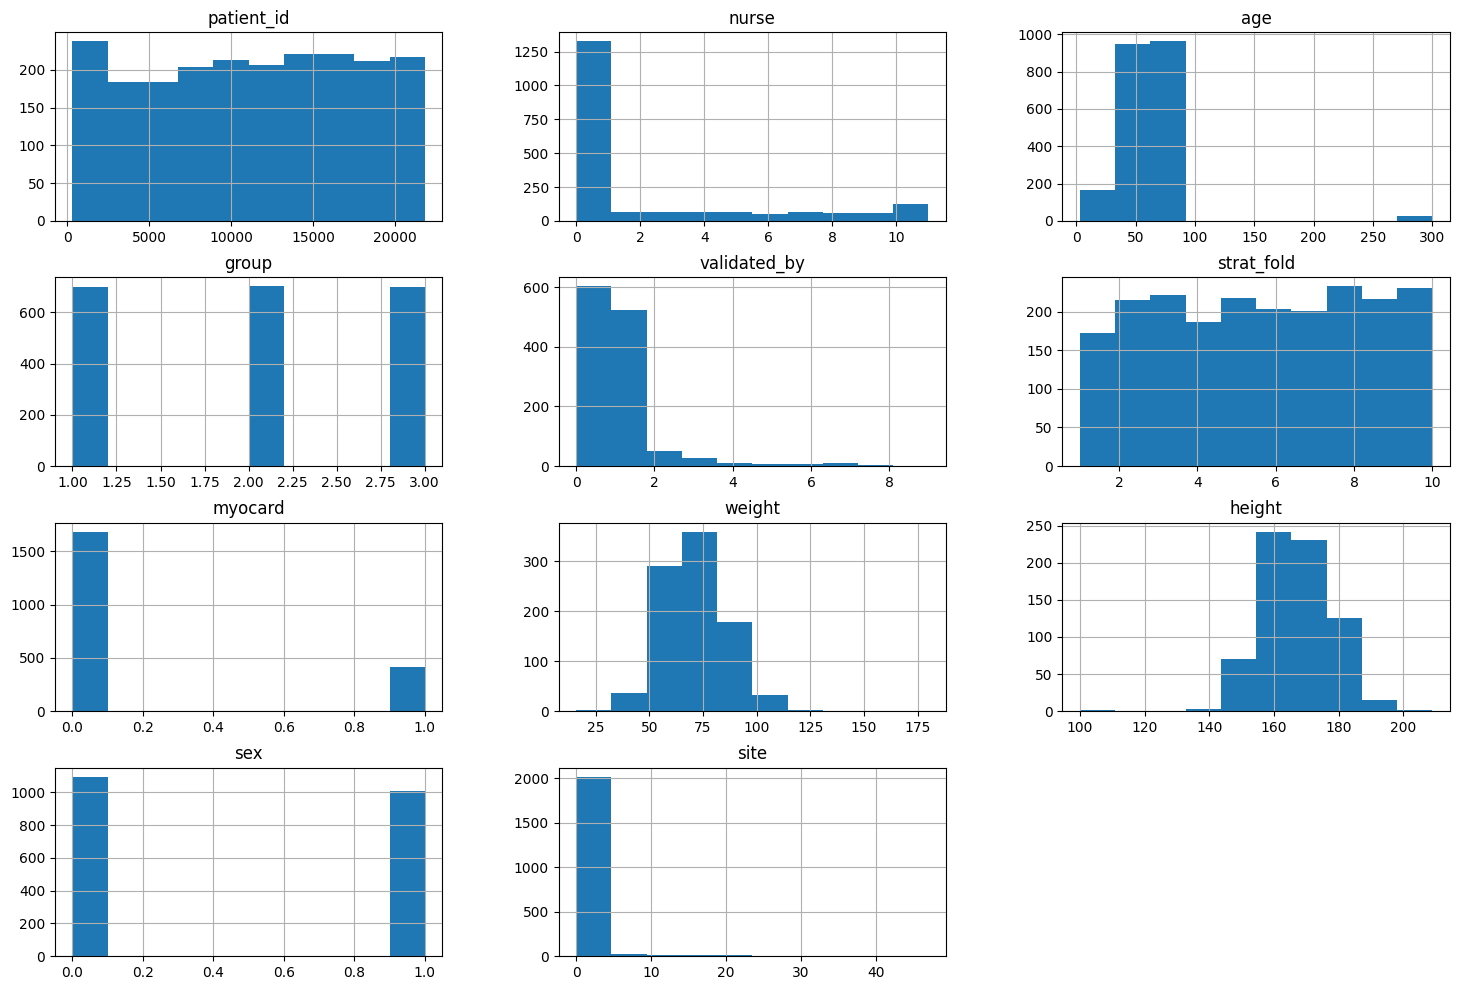

In [7]:
features = list(set(df.columns) - set(['DateTime']))

_ = df[features].hist(figsize=(18,12))

In [8]:
# Убираем пустые столбцы, создаём их список
sum_na = df.isna().sum(axis=0)
dropped = list(sum_na[sum_na > 1100].keys())
df.drop(dropped, axis=1, inplace=True)
print(dropped)

['height', 'weight', 'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker']


In [81]:
sum_na = df.isna().sum(axis=0)
print(sum_na[sum_na != 0])
sum_na[sum_na != 0].keys()

height                 1412
weight                 1196
nurse                   154
site                      1
heart_axis              870
infarction_stadium1    1593
infarction_stadium2    2091
validated_by            859
baseline_drift         1950
static_noise           1791
burst_noise            2060
electrodes_problems    2097
extra_beats            1927
pacemaker              2070
dtype: int64


Index(['height', 'weight', 'nurse', 'site', 'heart_axis',
       'infarction_stadium1', 'infarction_stadium2', 'validated_by',
       'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems',
       'extra_beats', 'pacemaker'],
      dtype='object')

In [10]:
'''def fillmean(*col_names):
    for col in col_names:
        if (df.dtypes[col] != float):
            raise Exception(f"Type of column `{col}` is not float")
        else:
            df[col].fillna(df[df[col].notna()][col].mean(), inplace=True)
    df[list(col_names)].hist(figsize=(8,4))

df.loc[df["age"]>100, ["age"]] = np.nan
fillmean( "age", "height","weight") # nurse, site, validated_by, heart_axis... – категориальные

df.replace("unknown", "-1", inplace=True)
for col in sum_series[sum_series != 0].keys(): # crINGE
    nonevalue = np.array(-1).astype(df.dtypes[col])
    df[col].fillna(nonevalue, inplace=True)'''

'def fillmean(*col_names):\n    for col in col_names:\n        if (df.dtypes[col] != float):\n            raise Exception(f"Type of column `{col}` is not float")\n        else:\n            df[col].fillna(df[df[col].notna()][col].mean(), inplace=True)\n    df[list(col_names)].hist(figsize=(8,4))\n\ndf.loc[df["age"]>100, ["age"]] = np.nan\nfillmean( "age", "height","weight") # nurse, site, validated_by, heart_axis... – категориальные\n\ndf.replace("unknown", "-1", inplace=True)\nfor col in sum_series[sum_series != 0].keys(): # crINGE\n    nonevalue = np.array(-1).astype(df.dtypes[col])\n    df[col].fillna(nonevalue, inplace=True)'

In [82]:
imd = []
for fn in df['record_name']:
    with open(f"train\{fn}.npy", "rb") as f:
        data = np.load(f, allow_pickle=True)
        imd.append([fn, data])
signals = pd.DataFrame(imd, columns=["record_name","signal"])
signals.head()

,record_name,signal
0,00009_hr,"[[-0.12, -0.12, -0.12, -0.12, -0.121, -0.12, -..."
1,00034_hr,"[[0.935, 0.935, 0.936, 0.932, 0.941, 0.935, 0...."
2,00043_hr,"[[-0.005, -0.005, -0.005, -0.005, -0.004, -0.0..."
3,00052_hr,"[[-0.025, -0.025, -0.025, -0.025, -0.025, -0.0..."
4,00057_hr,"[[-0.155, -0.155, -0.155, -0.156, -0.153, -0.1..."


In [12]:
# # Визуализация ЭКГ | ECG Visualization
# person=4
# ll = images.iloc[person].astype(list)
# myoc = labels.iloc[person]
# for i in range(len(ll)):
#     plt.figure(figsize=(40, 8))
#     plt.title(f'ECG {person}-{i}')
#     plt.plot(list(ll[i]), 'go', linewidth=1, markersize=1, linestyle='-',
#             label='ECG')
#     plt.plot([0]*len(ll[i]), 'r', linewidth=2, markersize=0, linestyle='-',
#             label='ECG')
#     plt.grid(visible=True, which='both', axis='both')

#     plt.xlabel('t')
#     plt.ylabel('v')
#     plt.legend()
#     plt.show();
# print(myoc)

In [83]:
# alternative (with 12 channels)
imd = []
for fn in df['record_name']:
    with open(f"train/{fn}.npy", "rb") as f:
        data = np.load(f, allow_pickle=True).transpose()
        imd.append([fn, data])
signals = pd.DataFrame(imd, columns=["record_name","signal"])
signals.head()

,record_name,signal
0,00009_hr,"[[-0.12, -0.085, 0.035, 0.102, -0.077, -0.025,..."
1,00034_hr,"[[0.935, 0.27, -0.665, -0.602, 0.8, -0.197, -0..."
2,00043_hr,"[[-0.005, 0.19, 0.195, -0.093, -0.1, 0.192, 0...."
3,00052_hr,"[[-0.025, -0.075, -0.05, 0.05, 0.013, -0.062, ..."
4,00057_hr,"[[-0.155, -0.135, 0.02, 0.145, -0.087, -0.057,..."


In [84]:
signals.isna().sum()

record_name    0
signal         0
dtype: int64

In [15]:
# with open("tt.txt", mode="w") as f:
#     ll = signals.iloc[0,1].astype(list)
#     for l in ll:
#         f.write(str(list(l))+"\n")

In [85]:
all_im = pd.merge(df, signals, on='record_name', how='outer')
images = all_im["signal"]
labels = all_im["myocard"]

In [86]:
images[0].shape

(5000, 12)

In [18]:
import tensorflow as tf
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=50)
train_images, test_images, train_labels, test_labels = tf.convert_to_tensor(list(train_images)), tf.convert_to_tensor(list(test_images)),\
                                                       tf.convert_to_tensor(train_labels), tf.convert_to_tensor(test_labels)
train_images = np.reshape(train_images, (train_images.shape[0],1,train_images.shape[1],train_images.shape[2]))
test_images = np.reshape(test_images, (test_images.shape[0],1,test_images.shape[1],test_images.shape[2]))
# !!! 

In [19]:
test_images.shape

(421, 1, 5000, 12)

In [20]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Variables
INPUT_SHAPE = (1,5000, 12)
FILTER1_COUNT = 32
FILTER2_COUNT = 64
FILTER3_COUNT = 128
FILTER1_SHAPE = (1, 501)
FILTER2_SHAPE = (1, 21)
FILTER3_SHAPE = (1, 7)
STRIDE_SHAPE = (1, 10)
POOL_SHAPE = (1, 10)
FULLY_CONNECT_NUM = 32
NUM_CLASSES = 1

BATCH_SIZE = 70
EPOCHS = 25

# Model architecture implementation
model = Sequential()
model.add(Conv2D(FILTER1_COUNT, FILTER1_SHAPE, strides=STRIDE_SHAPE, activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPooling2D(pool_size=POOL_SHAPE))
model.add(Conv2D(FILTER2_COUNT, FILTER2_SHAPE, activation='relu'))
model.add(Conv2D(FILTER3_COUNT, FILTER3_SHAPE, activation='relu'))
model.add(Flatten())
model.add(Dense(FULLY_CONNECT_NUM, activation='relu'))
model.add(Dense(NUM_CLASSES, activation='sigmoid')) # model.add(Dense(1, activation='sigmoid'))
# # https://www.datacamp.com/tutorial/cnn-tensorflow-python#:~:text=of%20trainable%20parameters.-,Model%20training,-All%20the%20resources

from tensorflow.keras.metrics import Precision, Recall

METRICS = metrics=['accuracy',
               	Precision(name='precision'),
               	Recall(name='recall')]

model.compile(optimizer='sgd',
          	loss='binary_crossentropy',
          	metrics = METRICS)

In [21]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=9, shuffle=True, random_state=42)

# Train the model
training_history = model.fit(train_images, train_labels,
                	epochs=100, batch_size=70,
                	validation_data=(test_images, test_labels))

Epoch 1/100
24/24 [==============================] - 8s 290ms/step - loss: 0.5749 - accuracy: 0.7488 - precision: 0.1976 - recall: 0.1028 - val_loss: 0.5222 - val_accuracy: 0.7767 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
24/24 [==============================] - 6s 271ms/step - loss: 0.4738 - accuracy: 0.8089 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.5092 - val_accuracy: 0.7767 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
24/24 [==============================] - 6s 268ms/step - loss: 0.4559 - accuracy: 0.8089 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4976 - val_accuracy: 0.7767 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
24/24 [==============================] - 6s 261ms/step - loss: 0.4388 - accuracy: 0.8089 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.4868 - val_accuracy: 0.7767 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
 9/24 [==========>..............

KeyboardInterrupt: 

In [22]:
print(f1_score(test_labels, np.array(model.predict(test_images) > 0.5), average = 'macro'))
print(f1_score(test_labels, np.array(model.predict(test_images) > 0.5)))

14/14 [==============================] - 0s 20ms/step
0.4371657754010695
14/14 [==============================] - 0s 21ms/step
0.0


In [ ]:
# print(f1_score(test_labels, np.array(model.predict(test_images) > 0.5), average = 'macro'))
# print(f1_score(test_labels, np.array(model.predict(test_images) > 0.5)))

14/14 [==============================] - 0s 27ms/step
0.7680008692885029
14/14 [==============================] - 0s 29ms/step
0.6467661691542288


In [ ]:
# model.save('3_cv_model.ckpt')

INFO:tensorflow:Assets written to: 3_cv_model.ckpt\assets


INFO:tensorflow:Assets written to: 3_cv_model.ckpt\assets


In [ ]:
# import tensorflow as tf
# model = tf.keras.models.load_model("second_cv_model.ckpt")

In [ ]:
# model.save('first_cv_model.ckpt')
# nm = tf.keras.models.load_model('first_cv_model.ckpt')
# h=nm.fit(train_images, train_labels,
#                 	epochs=1, batch_size=BATCH_SIZE,
#                 	validation_data=(test_images, test_labels))

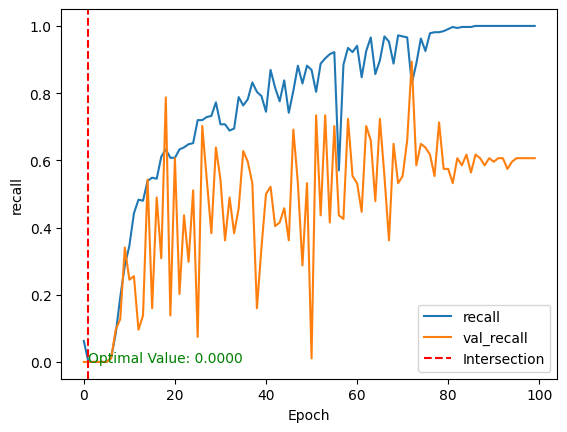

In [ ]:
def show_performance_curve(training_result, metric, metric_label):
    
	train_perf = training_result.history[str(metric)]
	validation_perf = training_result.history['val_'+str(metric)]
	intersection_idx = np.argwhere(np.isclose(train_perf,
                                            	validation_perf, atol=1e-2)).flatten()[0]
	intersection_value = train_perf[intersection_idx]
    
	plt.plot(train_perf, label=metric_label)
	plt.plot(validation_perf, label = 'val_'+str(metric))
	plt.axvline(x=intersection_idx, color='r', linestyle='--', label='Intersection')
    
	plt.annotate(f'Optimal Value: {intersection_value:.4f}',
         	xy=(intersection_idx, intersection_value),
         	xycoords='data',
         	fontsize=10,
         	color='green')
            	 
	plt.xlabel('Epoch')
	plt.ylabel(metric_label)
	plt.legend(loc='lower right')
show_performance_curve(training_history, 'recall', 'recall')

In [ ]:
'''plt.rcParams['figure.figsize']=(10,10)

corr = dtn.corr()
g = sns.heatmap(corr, square = True, annot=True)'''
None

In [ ]:

#dtn["device"].isin([511]).any()
#dtn.drop(labels = [444],axis = 0)
#dtn.drop(labels = [511],axis = 0)


In [87]:
dtn = df.iloc[:,:-1]
ans = df.iloc[:,-1:]
#ans.head()

In [ ]:
# predicted_cv = model.predict(tf.convert_to_tensor(list(images)))>0.5
# predicted_cv_df = pd.DataFrame((signals["record_name"], predicted_cv.reshape((predicted_cv.shape[0],)))).transpose()
# predicted_cv_df.rename(columns={"Unnamed 0":"pred"}, inplace=True)

# dtn = pd.merge(dtn, predicted_cv_df, on='record_name', how='outer')

In [88]:
X = dtn.drop(["validated_by","initial_autogenerated_report", "filename_lr", "filename_hr", "record_name", "patient_id", "recording_date", "report"], axis = 1)
X["second_opinion"] = X['second_opinion'].astype(int)
#X["initial_autogenerated_report"] = X['initial_autogenerated_report'].astype(int)
X["validated_by_human"] = X['validated_by_human'].astype(int)
X["BMI"] = X["weight"]*1e04 / (X["height"]).apply(np.square)
# X["pred"] = X["pred"].astype(int)

cat_vars=['device', "scp_codes", 'heart_axis', 'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'static_noise', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker']  
print(dict(X.dtypes))

{'age': dtype('float64'), 'sex': dtype('int64'), 'height': dtype('float64'), 'weight': dtype('float64'), 'nurse': dtype('float64'), 'site': dtype('float64'), 'device': dtype('O'), 'scp_codes': dtype('O'), 'heart_axis': dtype('O'), 'infarction_stadium1': dtype('O'), 'infarction_stadium2': dtype('O'), 'second_opinion': dtype('int32'), 'validated_by_human': dtype('int32'), 'baseline_drift': dtype('O'), 'static_noise': dtype('O'), 'burst_noise': dtype('O'), 'electrodes_problems': dtype('O'), 'extra_beats': dtype('O'), 'pacemaker': dtype('O'), 'strat_fold': dtype('int64'), 'group': dtype('int64'), 'BMI': dtype('float64')}


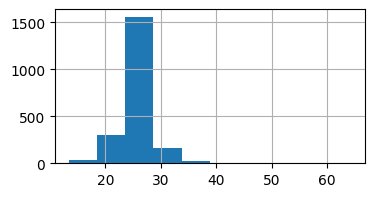

In [ ]:
_ = X["BMI"].hist(figsize=(4,2))

In [89]:
for i in cat_vars:
    classifier = dict()
    cls_num = 0
    if i in X.columns:
        for j in X.index:
            if X[i][j] not in classifier:
                classifier[X[i][j]] = cls_num
                X.loc[j, i]= classifier[X[i][j]]
                cls_num += 1
            else:
                X.loc[j, i]= classifier[X[i][j]]
    else:
        print(i,"not in X")

In [ ]:
# categorial_data = X[list(set(cat_vars)-set(dropped))]
# numeric_data = X[list(set(X.columns)-set(cat_vars))]
# dummy_features = pd.get_dummies(categorial_data).astype(int)
# # Не помогает!!!
# X = pd.concat([numeric_data, dummy_features], axis=1)
# X.head(3)

In [90]:
X.head(6)

,age,sex,height,weight,nurse,site,device,scp_codes,heart_axis,infarction_stadium1,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,group,BMI
0,55.0,0,NaN,70.0,2.0,0.0,0,0,0,0,...,1,0,0,0,0,0,0,10,1,NaN
1,56.0,0,NaN,NaN,2.0,0.0,0,1,0,0,...,1,0,1,0,0,0,0,9,3,NaN
2,25.0,1,NaN,63.0,2.0,0.0,0,0,0,0,...,1,0,2,0,0,0,0,8,3,NaN
3,35.0,0,NaN,82.0,2.0,0.0,0,2,0,0,...,1,0,2,0,0,0,0,1,2,NaN
4,26.0,0,NaN,93.0,2.0,0.0,0,0,0,0,...,1,0,2,0,0,0,0,10,3,NaN
5,25.0,0,NaN,70.0,2.0,0.0,0,0,0,0,...,1,0,2,0,0,0,0,6,1,NaN


In [91]:
X.isna().sum().sum()

4195

In [ ]:
X.drop(["heart_axis", "second_opinion", "height", "weight", "device", "site", "nurse", "strat_fold","scp_codes", "static_noise", "sex"], axis=1, inplace=True, errors="ignore")

In [ ]:
'''plt.rcParams['figure.figsize']=(10,10)

corr = X.corr()
g = sns.heatmap(corr, square = True, annot=True)'''
None

In [ ]:
list(dtn['scp_codes'].unique())

["{'NORM': 100.0, 'SR': 0.0}",
 "{'AFLT': 100.0}",
 "{'IRBBB': 100.0, 'SR': 0.0}",
 "{'LVH': 100.0, 'SR': 0.0}",
 "{'NORM': 80.0, 'STACH': 0.0}",
 "{'NDT': 100.0, 'SR': 0.0}",
 "{'ASMI': 50.0, 'ABQRS': 0.0, 'SR': 0.0}",
 "{'NORM': 80.0, 'SR': 0.0}",
 "{'PACE': 100.0}",
 "{'LAFB': 100.0, 'SR': 0.0}",
 "{'NST_': 100.0, 'SR': 0.0}",
 "{'NST_': 100.0, 'PVC': 100.0, 'SR': 0.0}",
 "{'CRBBB': 100.0, 'LAFB': 100.0, 'SR': 0.0}",
 "{'LVH': 100.0, 'ISC_': 100.0, 'SR': 0.0}",
 "{'IMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}",
 "{'NDT': 100.0, '1AVB': 100.0, 'SR': 0.0}",
 "{'IMI': 100.0, 'CRBBB': 100.0, 'PAC': 0.0, 'LPR': 0.0, 'QWAVE': 0.0, 'SR': 0.0}",
 "{'NORM': 100.0, 'SARRH': 0.0}",
 "{'LVH': 100.0, 'ISC_': 100.0, 'PVC': 100.0, 'NST_': 0.0, 'AFLT': 0.0, 'SVTAC': 0.0}",
 "{'LAFB': 100.0, 'LVOLT': 0.0, 'SR': 0.0}",
 "{'LVH': 100.0, 'ISC_': 100.0}",
 "{'NORM': 80.0, 'PAC': 0.0, 'SR': 0.0}",
 "{'IRBBB': 80.0, 'SR': 0.0}",
 "{'NORM': 80.0, 'IRBBB': 100.0, 'SARRH': 0.0}",
 "{'ASMI': 100.0, 'IMI': 50.0, 'IRBB

In [92]:
y = ans["myocard"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)


In [93]:
categorical_features_indices = np.where([column_name in cat_vars for column_name in X.columns])[0]
# categorical_features_indices = np.where(X.dtypes != float)[0]

params = {
    'iterations': 100,
    'learning_rate': 0.05,
    'eval_metric': catmetrics.F1(),
    'random_seed': 50,
    'logging_level': 'Silent',
    'use_best_model': True
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
validate_pool = Pool(X_test, y_test, cat_features=categorical_features_indices)
best_model = CatBoostClassifier(**params)
best_model.fit(train_pool, eval_set=validate_pool)

    
print(f1_score(y_test, best_model.predict(X_test), average = 'macro'))
print(f1_score(y_test, best_model.predict(X_test)))
print(accuracy_score(y_test, best_model.predict(X_test)))

0.843662625057974
0.7481481481481482
0.9020172910662824


In [27]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
sc = StandardScaler()

In [28]:
def fit_and_print_f1(model, scale=True, name=None):
    if name is None:
        name = model.__class__.__name__[:10]+"."
    if scale:
        model.fit(pd.DataFrame(sc.fit_transform(X_train)),y_train)
    print(name+": ",f1_score(y_test, np.array(model.predict( pd.DataFrame(sc.transform(X_test))) > 0.5), average = 'macro'))
    return model

In [94]:
elastic = fit_and_print_f1(ElasticNet(alpha=0.4, max_iter=20000))
linear = fit_and_print_f1(LinearRegression())
knn = fit_and_print_f1(KNeighborsRegressor(15))
forest = fit_and_print_f1(RandomForestRegressor(200, max_depth=5))
tree = fit_and_print_f1(DecisionTreeClassifier(max_depth=5))

ValueError: Input X contains NaN.
ElasticNet does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print({X.columns[i]:w for i,w in enumerate(list(np.around(linear.coef_ * 1e02, decimals=4)))})

{'age': 2.2549, 'infarction_stadium1': 16.6038, 'validated_by_human': -1.9907, 'group': -0.0149, 'pred': 19.7492, 'BMI': -0.8895}


In [ ]:
X.head()

,age,infarction_stadium1,validated_by_human,group,pred,BMI
0,55.0,0,1,1,0,24.996423
1,56.0,0,1,3,0,25.569743
2,25.0,0,1,3,0,22.496781
3,35.0,0,1,2,0,29.281524
4,26.0,0,1,3,0,33.209534


In [95]:
X["group"].unique()

array([1, 3, 2], dtype=int64)

In [98]:
def test_random(X,y,scale=False,n=1):
    m=[]
    for i in range(0,n):
        X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.33, random_state=i)
        if scale:
            sc = StandardScaler()

            X_tn = pd.DataFrame(sc.fit_transform(X_tn))
            X_tt = pd.DataFrame(sc.transform(X_tt))
        params = {
            'iterations': 150,
            'learning_rate': 0.05,
            'eval_metric': catmetrics.F1(),
            'random_seed': 50,
            'logging_level': 'Silent',
            'use_best_model': True
        }
        train_pool = Pool(X_tn, y_tn, cat_features=[])
        validate_pool = Pool(X_tt, y_tt, cat_features=[])
        best_model = CatBoostClassifier(**params)
        best_model.fit(train_pool, eval_set=validate_pool)
        pp = best_model.predict(X_tt)
        m.append(f1_score(y_tt, pp, average = 'macro'))
    print("RESULT:",np.array(m).mean()*100)


In [190]:
X_tn, X_tt, y_tn, y_tt = train_test_split(X, y, test_size=0.33, random_state=50)
sc = StandardScaler()

X_tn = pd.DataFrame(sc.fit_transform(X_tn))
X_tt = pd.DataFrame(sc.transform(X_tt))
params = {
            'iterations': 150,
            'learning_rate': 0.05,
            'eval_metric': catmetrics.F1(),
            'random_seed': 50,
            'logging_level': 'Silent',
            'use_best_model': True
        }
train_pool = Pool(X_tn, y_tn, cat_features=[])
validate_pool = Pool(X_tt, y_tt, cat_features=[])
best_model = CatBoostClassifier(**params)
best_model.fit(train_pool, eval_set=validate_pool)
pp = best_model.predict(X_tt)


print(f1_score(y_tt, pp, average = 'macro'))



2045    0
1561    0
275     0
347     0
2076    0
       ..
1929    0
309     1
450     0
1535    0
700     0
Name: myocard, Length: 694, dtype: int64
0.8853554007511649


In [ ]:
X = dtn.drop(["initial_autogenerated_report", "filename_lr", "filename_hr", "record_name", "patient_id", "recording_date", "report", "scp_codes", "static_noise", "recording_date"], axis = 1)
X["second_opinion"] = X['second_opinion'].astype(int)
#X["initial_autogenerated_report"] = X['initial_autogenerated_report'].astype(int)
X["validated_by_human"] = X['validated_by_human'].astype(int)
cat_vars=['device', 'heart_axis', 'infarction_stadium1', 'infarction_stadium2', 'baseline_drift', 'burst_noise', 'electrodes_problems', 'extra_beats', 'pacemaker']
classifier = {0 : 0}
clss = 1
#print(X['device'])
er = [444, 511, 523, 533, 550, 552, 553, 594, 635, 676, 677, 698, 701, 702, 706, 710, 721, 725, 729, 732, 737, 751, 752, 753, 779, 817, 896,918, 937, 1091, 1114, 1128, 1148, 1154, 1158, 1192, 1283, 1294, 1301, 1328, 1333, 1336, 1443, 1455, 1458, 1475, 1489, 1495, 1503, 1512, 1541, 1646, 1649, 1662, 1674, 1740, 1751, 1796, 1798, 1800, 1801, 1816, 1823, 1828, 1838, 1839, 1842, 1848, 1855, 1880, 1902, 1918, 1923, 1926, 1941, 1945, 1946, 1957, 1960, 1970, 1971, 2008, 2009, 2017, 2020, 2023, 2027, 2028, 2029, 2056, 2068, 2069, 2070, 2072, 2074, 2078, 2080, 2081, 2082, 2084, 2086]
for i in cat_vars:
    for j in range(2097):
        if j not in er:
            if X[i][j] not in classifier:
                classifier[X[i][j]] = clss
                X.loc[j, i]= classifier[X[i][j]]
                clss += 1
            else:
                X.loc[j, i]= classifier[X[i][j]]

    

In [198]:
sub = pd.read_csv('test/test_meta.csv')

print(sub)
'''nw = X
n = y
nw["myocard"] = best_model.predict()
n = pd.DataFrame(nw[["record_name","myocard"]])
n.set_index("record_name", inplace=True)
nw.head()'''

     ecg_id  patient_id   age  sex  height  weight  nurse  site      device  \
0       127     11926.0  22.0    1     NaN    52.0    0.0   0.0   CS-12   E   
1       186     12396.0  60.0    1     NaN     NaN    NaN   3.0      AT-6 C   
2       193     17536.0  28.0    0     NaN   112.0    0.0   0.0   CS-12   E   
3       198     21074.0  19.0    1     NaN    59.0    0.0   0.0   CS-12   E   
4       211     18690.0  85.0    1     NaN     NaN    1.0   2.0       CS-12   
..      ...         ...   ...  ...     ...     ...    ...   ...         ...   
444   21269      8951.0  44.0    0     NaN     NaN    1.0   2.0       CS-12   
445   21301     21392.0  71.0    0     NaN     NaN    0.0   0.0  CS100    3   
446   21366     17212.0  62.0    1     NaN     NaN    0.0   0.0  CS100    3   
447   21547     13332.0  40.0    0     NaN     NaN    0.0   0.0  CS100    3   
448   21836      8873.0  64.0    1     NaN     NaN    1.0   2.0  AT-60    3   

          recording_date  ...  static_noise burst_n

'nw = X\nn = y\nnw["myocard"] = best_model.predict()\nn = pd.DataFrame(nw[["record_name","myocard"]])\nn.set_index("record_name", inplace=True)\nnw.head()'

In [118]:
#pp = pd.DataFrame(new_X[["record_name","myocard"]])
#pp.set_index("record_name", inplace=True)
pp.head()

""
record_name
00127_hr
00186_hr
00193_hr
00198_hr
00211_hr


In [99]:
test_random(X,y,True)

RESULT: 88.38953019725936


In [ ]:
raise Exception("booba")

Exception: booba

In [33]:
y = ans["myocard"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=23)


In [34]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
# Задаем сеть 
nn = Sequential()
nn.add(Dense(round(X.shape[1] / 1.2), input_shape=(X.shape[1],)))
nn.add(Dense(round(X.shape[1] / 2), activation='relu'))
nn.add(Dense(round(X.shape[1] / 3.6), activation='relu'))
nn.add(Dense(round(X.shape[1] / 5)))
nn.add(Dense(round(X.shape[1] / 7), activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

In [35]:
nn.compile(optimizer='SGD', loss='binary_crossentropy',  metrics=["Recall"])

In [76]:
history = nn.fit(X_train, y_train, batch_size=25, epochs=200, validation_split=0.2, verbose=0)

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

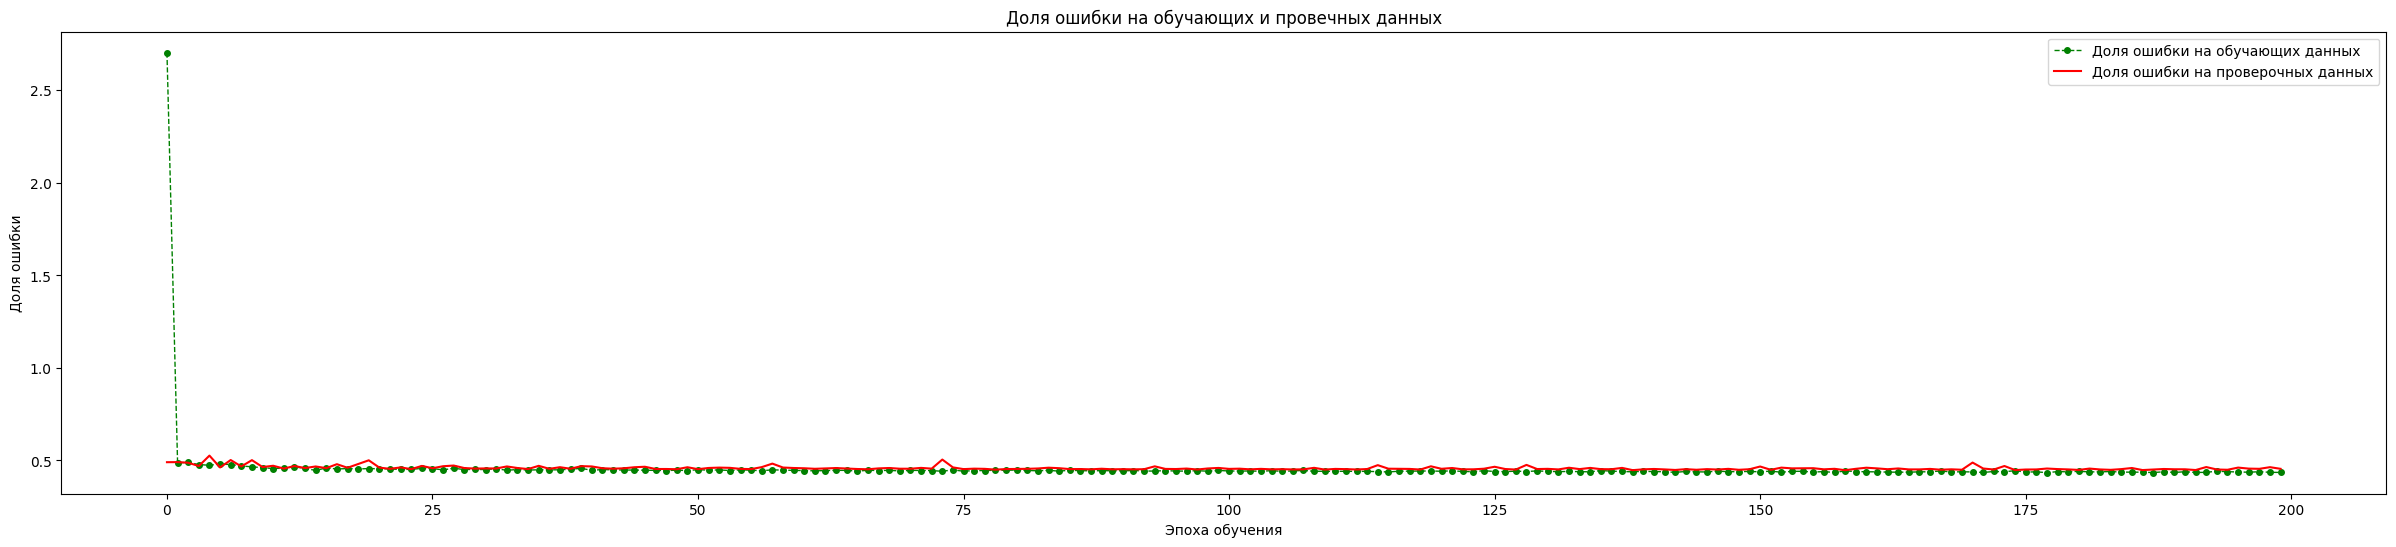

In [ ]:
plt.figure(figsize=(30, 6))
plt.title('Доля ошибки на обучающих и провечных данных')
plt.plot(history.history['loss'][0:], 'go', linewidth=1, markersize=4, linestyle='--',
         label='Доля ошибки на обучающих данных')
plt.plot(history.history['val_loss'][0:], 'r', linewidth=1.5, markersize=1, linestyle='-',
         label='Доля ошибки на проверочных данных')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля ошибки'),
plt.legend()
plt.show();

In [37]:
print(f1_score(y_test, np.array(nn.predict(X_test) > 0.5), average = 'macro'))
print(f1_score(y_test, np.array(nn.predict(X_test) > 0.5)))

AttributeError: module 'tensorflow.python.distribute.input_lib' has no attribute 'DistributedDatasetInterface'

In [75]:
params = {
    'iterations': 100,
    'learning_rate': 0.05,
    'eval_metric': catmetrics.F1(),
    'random_seed': 50,
    'logging_level': 'Silent',
    'use_best_model': True
}
train_pool = Pool(X_train, y_train, cat_features=[])
validate_pool = Pool(X_test, y_test, cat_features=[])
best_model = CatBoostClassifier(**params)
best_model.fit(train_pool, eval_set=validate_pool)

    
print(f1_score(y_test, best_model.predict(X_test), average = 'macro'))
print(f1_score(y_test, best_model.predict(X_test)))

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=4]="AT-6 C 5.5": Cannot convert 'b'AT-6 C 5.5'' to float

In [39]:
X_train_stack = np.hstack((X_train, np.array(best_model.predict(X_train) > 0.5).reshape(-1,1))) 
X_test_stack = np.hstack((X_test, np.array(best_model.predict(X_test) > 0.5).reshape(-1,1)))

NameError: name 'best_model' is not defined

In [40]:
def fit_and_print_f1_stacked(model, name=None):
    if name is None:
        name = model.__class__.__name__[:10]+"."
    model.fit(X_train_stack,y_train)
    print(name+": ",f1_score(y_test, np.array(model.predict(X_test_stack) > 0.5), average = 'macro'))
    return model

In [ ]:
from sklearn.svm import LinearSVC

elastic = fit_and_print_f1_stacked(ElasticNet(alpha=0.4, max_iter=20000))
linear = fit_and_print_f1_stacked(LinearRegression())
knn = fit_and_print_f1_stacked(KNeighborsRegressor(15))
forest = fit_and_print_f1_stacked(RandomForestRegressor(200, max_depth=3))
svc = fit_and_print_f1_stacked(LinearSVC(
						   C = 3, 
						   intercept_scaling = 0.4, 
						   class_weight = 'balanced', 
						   random_state = 1057832
						 ))

ElasticNet.:  0.4386712095400341


LinearRegr.:  0.8341303800654417
KNeighbors.:  0.48465570444265965
RandomFore.:  0.8240271607763987
LinearSVC.:  0.7206873964474242


c:\Users\MoreIT\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
print(dict(enumerate(list(np.around(linear.coef_ * 1e02, decimals=4)))))

{0: 1.8635, 1: 0.1264, 2: -0.0447, 3: 0.2638, 4: 1.0769, 5: 0.0599, 6: 10.1961, 7: 4.4043, 8: -1.5997, 9: -16.2333, 10: 0.0627, 11: -5.7837, 12: -6.4751, 13: -2.9628, 14: -13.7663, 15: -4.5103, 16: -11.2345, 17: 39.455, 18: 3.3435, 19: 5.0822, 20: -4.6377, 21: -9.1839, 22: 4.8899, 23: 4.3043, 24: 0.0, 25: 0.0, 26: -0.5816, 27: 0.0, 28: 0.0, 29: -54.9685, 30: 0.0, 31: -13.7197, 32: 96.6932, 33: -4.8935, 34: 7.3142, 35: -3.0199, 36: -43.9392, 37: -11.5972, 38: 9.0325, 39: -4.8133, 40: 7.0712, 41: -1.2724, 42: 12.1276, 43: 0.0, 44: 0.0, 45: 29.5714, 46: 3.3095, 47: 11.2789, 48: -2.0462, 49: 19.7348, 50: -29.2285, 51: -30.3576, 52: -0.0, 53: -3.3803, 54: -5.6336, 55: -10.1298, 56: 9.937, 57: -7.8292, 58: -14.5663, 59: -0.0, 60: -0.3212, 61: -17.898, 62: 0.9948, 63: 1.6796, 64: -0.0, 65: -0.5831, 66: -2.7808, 67: -0.0, 68: -6.2126, 69: 8.0881, 70: -0.0, 71: -4.2099, 72: 1.4318, 73: -8.8516, 74: 5.3921, 75: 0.1795, 76: -0.0, 77: -0.0, 78: -6.8744, 79: -2.1329, 80: 0.0, 81: 42.6869, 82: 0.0, 

In [ ]:
X_train_stack = np.hstack((X_train_stack, np.array(forest.predict(X_train_stack) > 0.5).reshape(-1,1))) 
X_test_stack = np.hstack((X_test_stack, np.array(forest.predict(X_test_stack) > 0.5).reshape(-1,1))) 

In [ ]:
finaler = Sequential()
finaler.add(Dense(44, input_shape=(X_train_stack.shape[1],)))
finaler.add(Dense(11, activation='relu'))
finaler.add(Dense(6, activation='relu'))
finaler.add(Dense(1, activation='sigmoid'))
finaler.compile(optimizer='SGD', loss='binary_crossentropy',  metrics=["Accuracy"])

In [ ]:
history = finaler.fit(X_train_stack, y_train, batch_size=20, epochs=100, validation_split=0.2, verbose=0)

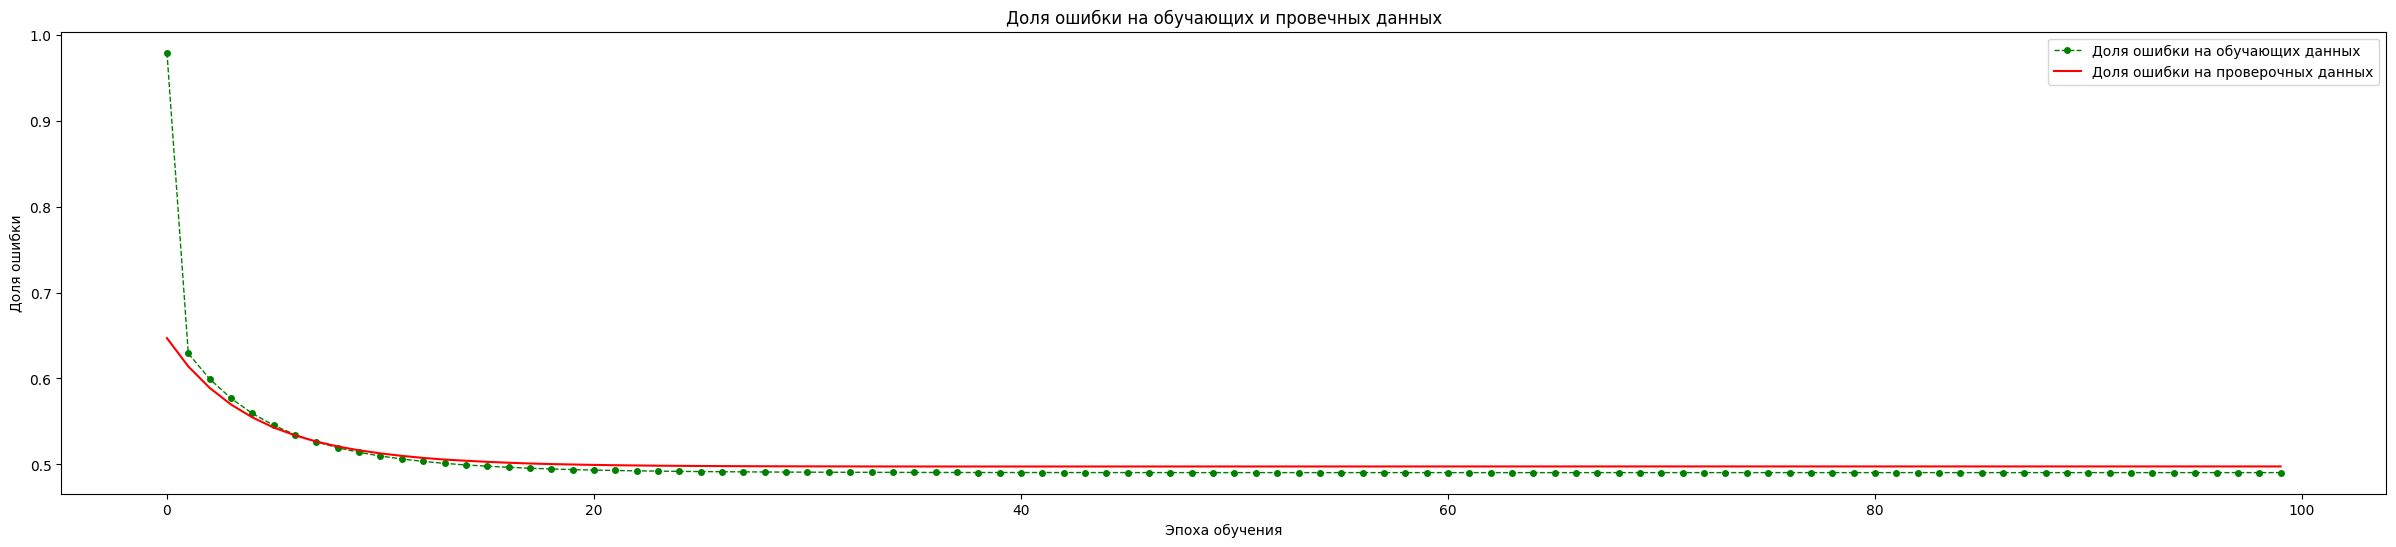

In [ ]:
plt.figure(figsize=(30, 6))
plt.title('Доля ошибки на обучающих и провечных данных')
plt.plot(history.history['loss'][0:], 'go', linewidth=1, markersize=4, linestyle='--',
         label='Доля ошибки на обучающих данных')
plt.plot(history.history['val_loss'][0:], 'r', linewidth=1.5, markersize=1, linestyle='-',
         label='Доля ошибки на проверочных данных')

plt.xlabel('Эпоха обучения')
plt.ylabel('Доля ошибки'),
plt.legend()
plt.show();

In [ ]:
print(f1_score(y_test, np.array(finaler.predict(X_test_stack) > 0.5), average = 'macro'))
print(f1_score(y_test, np.array(finaler.predict(X_test_stack) > 0.5)))

0.4386712095400341
0.0


In [ ]:
# TEST PART

In [134]:
new_X = pd.read_csv('test/test_meta.csv', index_col=0)

In [ ]:
print(dict(new_X.dtypes))
new_X.head(4)

{'patient_id': dtype('float64'), 'age': dtype('float64'), 'sex': dtype('int64'), 'height': dtype('float64'), 'weight': dtype('float64'), 'nurse': dtype('float64'), 'site': dtype('float64'), 'device': dtype('O'), 'recording_date': dtype('O'), 'report': dtype('O'), 'scp_codes': dtype('O'), 'heart_axis': dtype('O'), 'infarction_stadium1': dtype('O'), 'infarction_stadium2': dtype('O'), 'validated_by': dtype('float64'), 'second_opinion': dtype('bool'), 'initial_autogenerated_report': dtype('bool'), 'validated_by_human': dtype('bool'), 'baseline_drift': dtype('O'), 'static_noise': dtype('O'), 'burst_noise': dtype('O'), 'electrodes_problems': dtype('O'), 'extra_beats': dtype('O'), 'pacemaker': dtype('O'), 'strat_fold': dtype('int64'), 'filename_lr': dtype('O'), 'filename_hr': dtype('O'), 'record_name': dtype('O'), 'group': dtype('int64')}


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,record_name,group
ecg_id,,,,,,,,,,,,,,,,,,,,,
127,11926.0,22.0,1,NaN,52.0,0.0,0.0,CS-12 E,1986-01-30 13:10:31,sinusrhythmus unspezifisches abnormales t,...,", I-AVR,",NaN,NaN,NaN,NaN,9,records100/00000/00127_lr,records500/00000/00127_hr,00127_hr,1
186,12396.0,60.0,1,NaN,NaN,NaN,3.0,AT-6 C,1986-03-19 14:07:42,sinusbradykardi lÅga qrs amplituder i extremit...,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00186_lr,records500/00000/00186_hr,00186_hr,2
193,17536.0,28.0,0,NaN,112.0,0.0,0.0,CS-12 E,1986-03-22 09:24:13,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00193_lr,records500/00000/00193_hr,00193_hr,1
198,21074.0,19.0,1,NaN,59.0,0.0,0.0,CS-12 E,1986-04-18 10:52:02,sinusrhythmus normales ekg,...,NaN,NaN,NaN,NaN,NaN,9,records100/00000/00198_lr,records500/00000/00198_hr,00198_hr,2


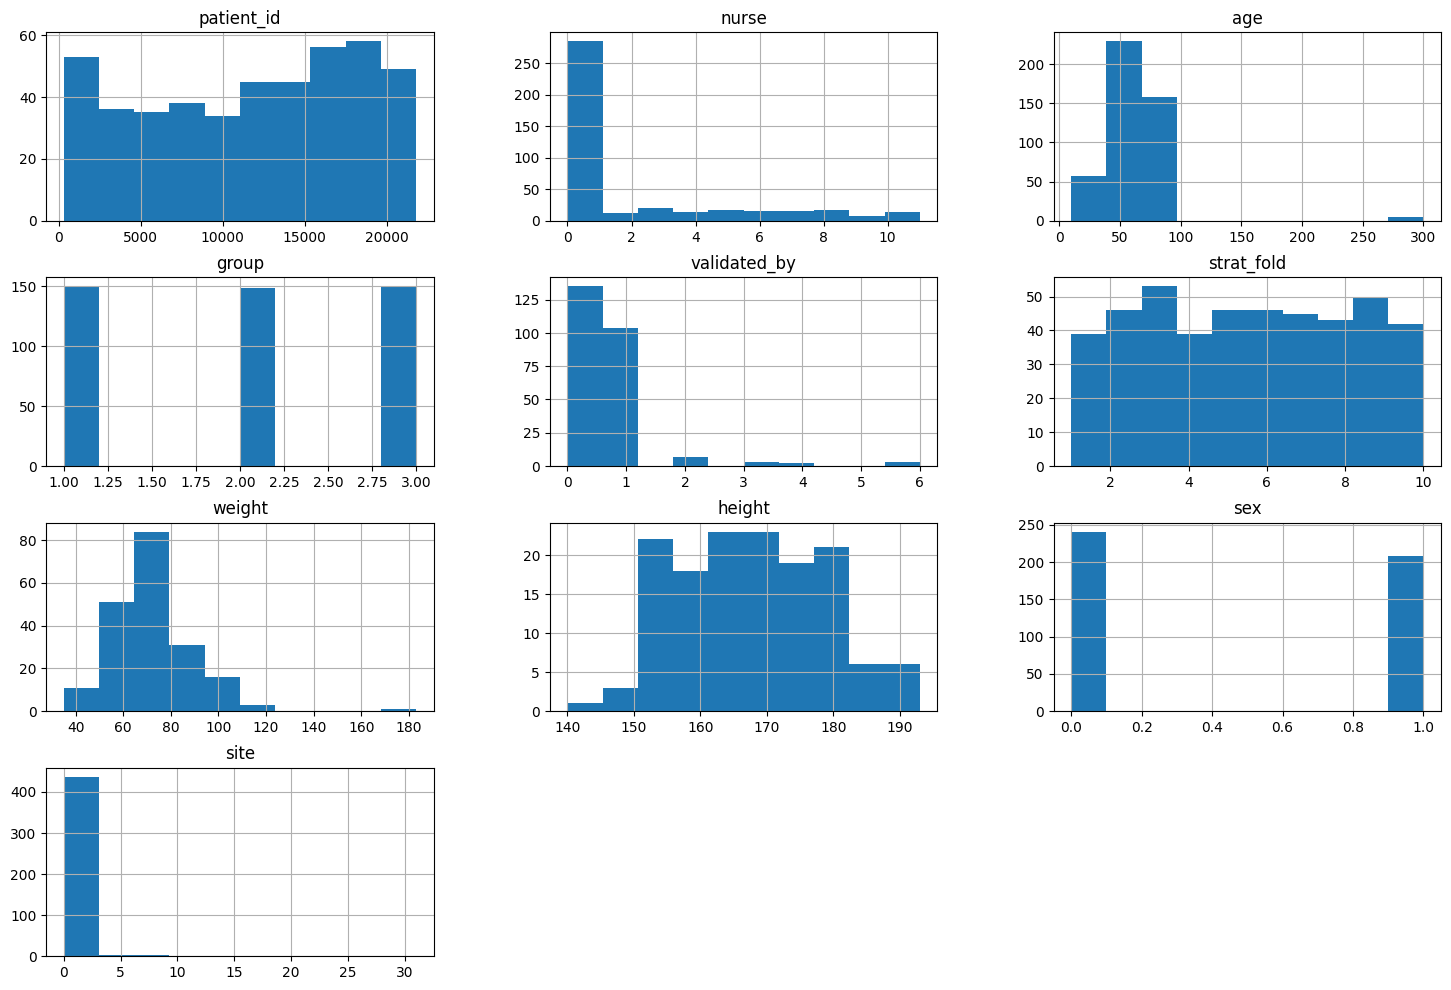

In [63]:
features = list(set(new_X.columns) - set(['DateTime']))

_ = new_X[features].hist(figsize=(18,12))

In [61]:
sum_series = new_X.isna().sum(axis=0)
print(sum_series[sum_series != 0])

nurse            27
heart_axis      176
validated_by    195
dtype: int64


In [46]:
# Убираем лишние столбцы
new_X.drop(dropped, axis=1, inplace=True, errors="ignore")

In [135]:
new_X.drop(["validated_by","initial_autogenerated_report", "filename_lr", "filename_hr",\
             "patient_id", "recording_date", "report",\
             "heart_axis", "second_opinion", "device",\
             "site", "nurse", "strat_fold","scp_codes", "static_noise", "sex"], axis=1, inplace=True)

In [136]:
new_X.head()

,age,height,weight,infarction_stadium1,infarction_stadium2,validated_by_human,baseline_drift,burst_noise,electrodes_problems,extra_beats,pacemaker,record_name,group
ecg_id,,,,,,,,,,,,,
127,22.0,NaN,52.0,NaN,NaN,True,", II-AVF,V5",NaN,NaN,NaN,NaN,00127_hr,1
186,60.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,00186_hr,2
193,28.0,NaN,112.0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,00193_hr,1
198,19.0,NaN,59.0,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,00198_hr,2
211,85.0,NaN,NaN,unknown,NaN,True,NaN,NaN,NaN,NaN,NaN,00211_hr,3


In [137]:
sum_series = new_X.isna().sum(axis=0)
print(sum_series[sum_series != 0])

height                 307
weight                 252
infarction_stadium1    341
infarction_stadium2    447
baseline_drift         413
burst_noise            435
electrodes_problems    447
extra_beats            403
pacemaker              447
dtype: int64


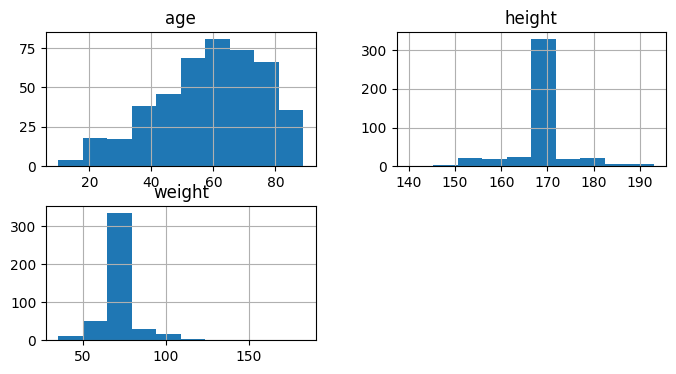

In [138]:
def fillmean_(*col_names):
    for col in col_names:
        if (new_X.dtypes[col] != float):
            raise Exception(f"Type of column `{col}` is not float")
        else:
            new_X[col].fillna(new_X[new_X[col].notna()][col].mean(), inplace=True)
    new_X[list(col_names)].hist(figsize=(8,4))

new_X.loc[new_X["age"]>100, ["age"]] = np.nan
fillmean_( "age", "height","weight") # nurse, site, validated_by, heart_axis... – категориальные

new_X.replace("unknown", "-1", inplace=True)
for col in sum_series[sum_series != 0].keys():
    nonevalue = np.array(-1).astype(new_X.dtypes[col])
    new_X[col].fillna(nonevalue, inplace=True)

In [139]:
cardiograms = []
for fn in new_X['record_name']:
    with open(f"test/{fn}.npy", "rb") as f:
        data = np.load(f, allow_pickle=True).transpose()
        cardiograms.append([fn, np.reshape(data, (1,data.shape[0],data.shape[1]))])
new_signals = pd.DataFrame(cardiograms, columns=["record_name","signal"])
new_signals.head()

,record_name,signal
0,00127_hr,"[[[0.105, 0.26, 0.155, -0.183, -0.025, 0.207, ..."
1,00186_hr,"[[[-0.005, -0.105, -0.1, 0.055, 0.048, -0.102,..."
2,00193_hr,"[[[0.055, 0.03, -0.025, -0.042, 0.04, 0.002, 0..."
3,00198_hr,"[[[0.05, 0.155, 0.105, -0.103, -0.028, 0.13, -..."
4,00211_hr,"[[[-0.09, -0.14, -0.05, 0.115, -0.02, -0.095, ..."


In [140]:
new_signals.isna().sum()

record_name    0
signal         0
dtype: int64

In [141]:
new_signals["signal"][0].shape

(1, 5000, 12)

In [142]:
new_cv = model.predict(tf.convert_to_tensor(list(new_signals["signal"])))>0.5
print(new_cv)
new_cv_df = pd.DataFrame({"record_name":new_signals["record_name"], "myocard":new_cv.astype(int)[:,0]})
new_cv_df.set_index("record_name", inplace=True)

15/15 [==============================] - 0s 22ms/step
[[False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 [False]
 

In [143]:
new_cv_df.head(5)

,myocard
record_name,
00127_hr,0
00186_hr,0
00193_hr,0
00198_hr,0
00211_hr,0


In [144]:
new_cv_df.to_csv("test_gts_only_ecg.csv")

In [ ]:
raise Exception

In [145]:
new_cv_df.rename(columns={"myocard":"pred"}, inplace=True)

new_X = pd.merge(new_X, new_cv_df, on='record_name', how='outer')

new_X["validated_by_human"] = new_X['validated_by_human'].astype(int)
new_X["BMI"] = new_X["weight"]*1e04 / (new_X["height"]).apply(np.square)
new_X["pred"] = new_X["pred"].astype(int)

new_X.drop(["height", "weight"], axis=1, inplace=True)

In [191]:
new_X.head(10)


,age,infarction_stadium1,infarction_stadium2,validated_by_human,baseline_drift,burst_noise,electrodes_problems,extra_beats,pacemaker,record_name,group,pred,BMI
0,22.0,-1,-1,1,", II-AVF,V5",-1,-1,-1,-1,00127_hr,1,0,18.464262
1,60.0,-1,-1,1,-1,-1,-1,-1,-1,00186_hr,2,0,25.668640
2,28.0,-1,-1,1,-1,-1,-1,-1,-1,00193_hr,1,0,39.769179
3,19.0,-1,-1,1,-1,-1,-1,-1,-1,00198_hr,2,0,20.949835
4,85.0,-1,-1,1,-1,-1,-1,-1,-1,00211_hr,3,0,25.668640
5,52.0,-1,-1,1,-1,-1,-1,-1,-1,00229_hr,2,0,21.659999
6,27.0,-1,-1,1,-1,-1,-1,-1,-1,00248_hr,3,0,27.341311
7,59.0,-1,-1,1,-1,-1,-1,-1,-1,00280_hr,2,0,24.212293
8,64.0,-1,-1,1,-1,-1,-1,-1,-1,00326_hr,2,0,32.882414
9,71.0,-1,-1,1,-1,-1,-1,-1,-1,00341_hr,3,0,19.031142


In [196]:
new_X["myocard"] = best_model.predict(new_X[["age","infarction_stadium1","validated_by_human","group","BMI"]])
new_y = pd.DataFrame(new_X[["record_name","myocard"]])
new_y.set_index("record_name", inplace=True)
new_y.head()

CatBoostError: Bad value for num_feature[non_default_doc_idx=14,feature_idx=1]="Stadium III": Cannot convert 'b'Stadium III'' to float

In [148]:
new_y.isna().sum()

NameError: name 'new_y' is not defined

In [ ]:
new_y.to_csv("test_gts.csv")